### Building a Chatbot with M
ultiple Tools Using LangGraph

#### AIM
create a chatbot with tool capabilities from arxiv, wikipedia search and some functions
##### Considering the below tools: 
* Arxiv for Research papers 
* Wikipedia for content 
* add() or multiply() function
* tavily for internet search (tavily API key)

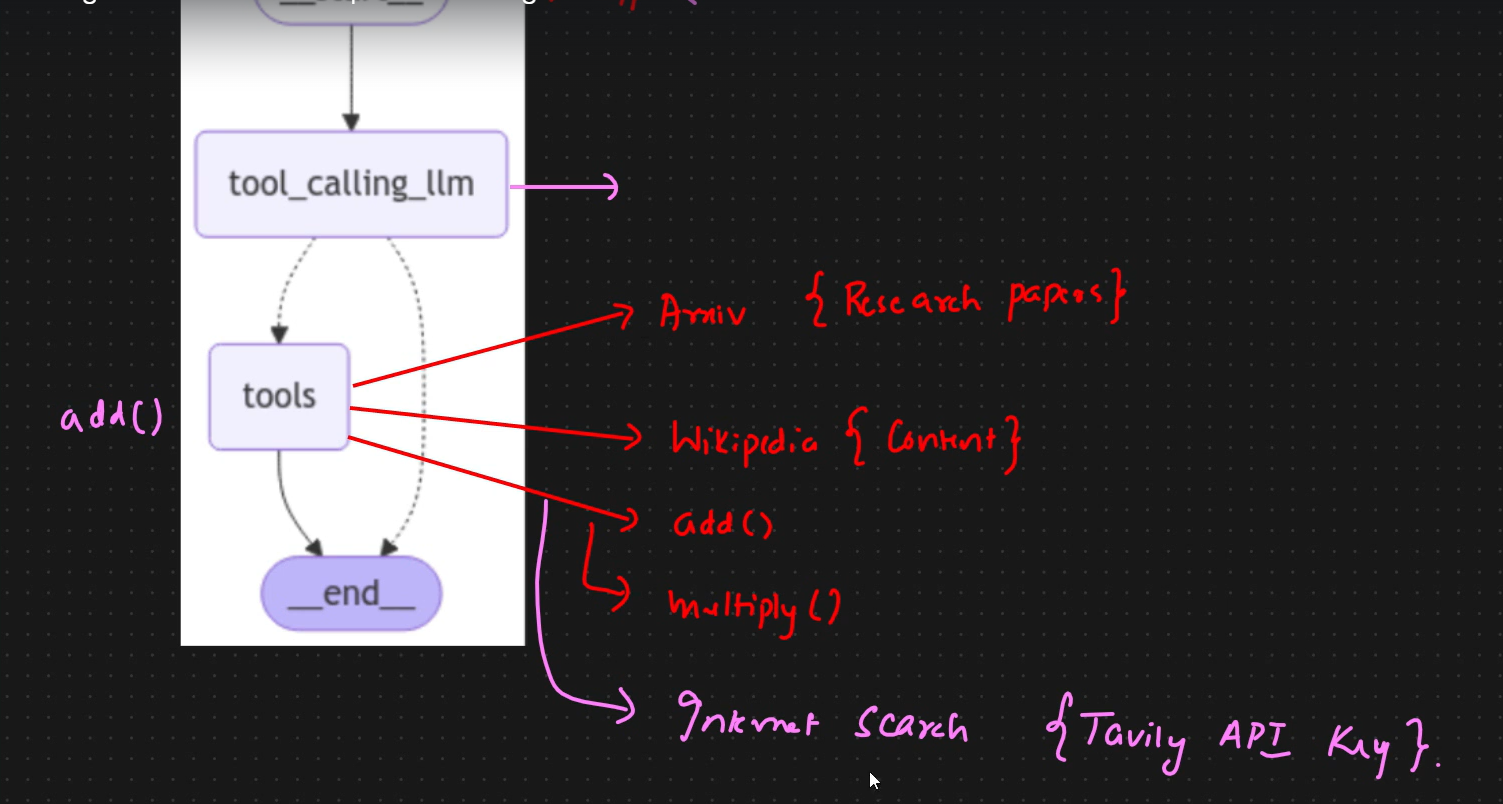


In [29]:
### LOAD THE KEYS FROM .env FILE and use for TAVILY

from dotenv import load_dotenv
load_dotenv() 

import os 
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [23]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper


In [22]:
### Creating API wrapper using ArxivQueryRun component from Langchain
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv)

api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=2, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500)


In [48]:
### Invoke arxiv to search the document (Somehow this is not giving the correct output from arxiv.org)
arxiv.run("Attention Is All You Need")


'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifically, we replace the attention layer in a vision transformer with a feed-forward layer applied over the patch dimension. The resulting architecture is simply a series of feed-forward layers applied over the patch and feature dimensions in an alternating fashion. In experiments on ImageNet, this architecture performs surprisingly well: a ViT/DeiT-base-sized model obtains 74.9\\% top-1 accuracy, compared to 77.9\\% and 79.9\\% for ViT and DeiT respectively. These results indicate that aspects

In [54]:
### Need to create tool with langchain Tool to make sure arxiv_tool bind into LLM. (If no tooling, it wont work. New change in latest langchain)
from langchain_core.tools import Tool

arxiv = Tool(
    name="arxiv_search",
    func=arxiv.run,
    description="Attention Is All You Need"
    
)


In [71]:
from langchain_core.tools import tool
from langchain_community.utilities import ArxivAPIWrapper

arxiv = ArxivAPIWrapper(top_k_results=3)

@tool
def arxiv_search(query: str) -> str:
    """Search arXiv for academic papers by title or topic."""
    return arxiv.run(query)

print(callable(arxiv_search))  # MUST print True


False


In [55]:
### Creating a API wrapper using WikipediaAPIWrapper component from Langchain
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaAPIWrapper(api_wrapper=api_wrapper_wiki)
print(wiki)

wiki_client=<module 'wikipedia' from 'c:\\Users\\venka\\python\\venv\\Lib\\site-packages\\wikipedia\\__init__.py'> top_k_results=3 lang='en' load_all_available_meta=False doc_content_chars_max=4000


In [ ]:
# Invoke wiki using run() 
wiki.run("What is Deep Learning?")

'Page: Deep learning\nSummary: In machine learning, deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification, regression, and representation learning. The field takes inspiration from biological neuroscience and revolves around stacking artificial neurons into layers and "training" them to process data. The adjective "deep" refers to the use of multiple layers (ranging from three to several hundred or thousands) in the network. Methods used can be supervised, semi-supervised or unsupervised.\nSome common deep learning network architectures include fully connected networks, deep belief networks, recurrent neural networks, convolutional neural networks, generative adversarial networks, transformers, and neural radiance fields. These architectures have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, mat

In [19]:
wiki.run("What is Data Science?")

'Page: Data science\nSummary: Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge from potentially noisy, structured, or unstructured data. \nData science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.\nData science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information scie

In [56]:
### Tavily search tool 
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [32]:
tavily.invoke("Provide me the recent AI news")

[{'title': 'AI News | Latest News | Insights Powering AI-Driven Business Growth',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'AI News delivers the latest updates in artificial intelligence, machine learning, deep learning, enterprise AI, and emerging tech worldwide.',
  'score': 0.99486035},
 {'title': 'Latest AI Research (Dec 2025): GPT-5, Agents & Trends',
  'url': 'https://intuitionlabs.ai/articles/latest-ai-research-trends-2025',
  'content': 'December 2025 finds AI research at a crossroads of spectacle and substance. On one hand, recent papers and announcements document staggering progress: models that reason like Olympians (( "Highlights: across two tiers: Olympiad,level collaboration")), AI scientists writing papers (( "Highlights: AI is increasingly playing a,system iteratively formulates scientific hypotheses")), and GPUs and quantum chips breaking prior limits (( "Highlights: IBM projects it will achieve,trade prediction [...] Recent AI research (la

In [57]:
tavily.invoke("Provide me the recent AI news in Dec 2025")

[{'title': 'Latest AI Research (Dec 2025): GPT-5, Agents & Trends | IntuitionLabs',
  'url': 'https://intuitionlabs.ai/articles/latest-ai-research-trends-2025',
  'content': 'Overall, Dec 2025 AI research highlights a maturing field: immense capabilities and applications are emerging (from labs to classrooms), underpinned by vast compute and data, yet accompanied by pressing challenges in reliability, ethics, and integration. This report surveys the latest studies, data, and expert commentary, aiming to provide a comprehensive picture of the state of AI research and its implications.\n\n# Introduction and Background [...] December 2025 finds AI research at a crossroads of spectacle and substance. On one hand, recent papers and announcements document staggering progress: models that reason like Olympians (( "Highlights: across two tiers: Olympiad,level collaboration")), AI scientists writing papers (( "Highlights: AI is increasingly playing a,system iteratively formulates scientific hyp

In [ ]:
tavily.invoke("Please provide me the latest Google Gemini3 news")

[{'title': 'A new era of intelligence with Gemini 3',
  'url': 'https://blog.google/products/gemini/gemini-3/',
  'content': '# A new era of intelligence with Gemini 3\n\nNov 18, 2025\n\nGemini 3 is our most intelligent model that helps you bring any idea to life.\n\nSundarPichai_2x.jpg\nDemis_headshot\nkoray\n\n## General summary\n\nGoogle introduces Gemini 3, its most intelligent AI model, enhancing reasoning and multimodal capabilities. You can now access Gemini 3 across Google products like the Gemini app, AI Studio, and Vertex AI. Expect Gemini 3 Deep Think mode for Ultra subscribers soon, with more models to follow. [...] For Gemini 3 Deep Think mode, we’re taking extra time for safety evaluations and input from safety testers before making it available to Google AI Ultra subscribers in the coming weeks.\n\nWe plan to release additional models to the Gemini 3 series soon so you can do more with AI. We look forward to getting your feedback and seeing what you learn, build and plan

In [72]:
### Combine all the tools in the list 
tools=[tavily]  
# For arxiv, wiki need to wrap with @tool before exposing as a function. Hence the error. For now, we will go with Tavily only
# If functions are not wrapped with @tool decorator, they wont bind correctly with LLM.This is the issue. 
# To fix this, we need to do the following:
# 1. Create API wrapper using langchain component
# 2. Wrap that API wrapper using @tool decorator 
# 3. Bind the tool with LLM

In [74]:
### Initialize my LLM model from Groq

from langchain_groq import ChatGroq
llm=ChatGroq(model="qwen/qwen3-32b")

### Binding the tools created above with my LLM and assign to a variable
llm_with_tools=llm.bind_tools(tools)


In [ ]:
from pprint import pprint 
from langchain_core.messages import AIMessage,HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the latest AI news")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the latest AI news. I need to figure out what they\'re looking for. Maybe they want recent developments, breakthroughs, or updates in the field of artificial intelligence. Since AI is a broad area, I should consider different aspects like advancements in machine learning, natural language processing, computer vision, or maybe ethical issues.\n\nI should check the current date to ensure the information is up-to-date. Wait, the tools provided include a search function called tavily_search_results_json. That\'s probably the best way to get the most recent news. The function requires a query parameter. The user\'s query is "What is the latest AI news," so I can use that as the search query.\n\nI need to make sure the search is comprehensive. Maybe include terms like "recent AI advancements," "latest AI research," or "current AI trends." But since the function is optimized for accurate and trusted re

In [78]:
# which tool my LLM is calling 
llm_with_tools.invoke([HumanMessage(content=f"What is the latest AI news")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'latest AI news 2024'},
  'id': '02e5kp4hd',
  'type': 'tool_call'}]

In [ ]:
### Define the schema using TypedDict

from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated # Annotate lets you attach extra metadata like age: Annotated[int, "Age of the user"]. Python sees age as int, but framework can read the metadata
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

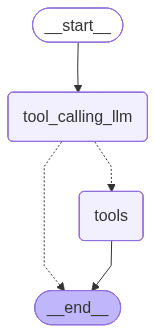

In [84]:
### Now, create entire chatbot with LangGraph 

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition 
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

### Build the graph 
builder = StateGraph(State)

### Adding nodes 
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

### Adding edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition (from langgraph.prebuilt import tools_condition) routes to tools
    # If the latest message (result) from assistant is not a tool call -> tools_condition (from langgraph.prebuilt import tools_condition) routes to END
    tools_condition,
)

builder.add_edge("tools", END)

# Compile the graph 
graph = builder.compile()

# View the graph 
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
# Now ask LLM the query. Now, LLM must call "tavily" search engine as a tool call and provide the results
# Here, LLM decide which tool to call. LLM is brain behind this process.
# For this example, I only have "tavily" search engine a tool. Need to add one more tool "wikipedia" later as I ran into an error with @tool decorator 

messages=graph.invoke({"messages":HumanMessage(content="What is attention is all you need")})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is attention is all you need
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (c0hjzncde)
 Call ID: c0hjzncde
  Args:
    query: Attention Is All You Need
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Attention Is All You Need - Wikipedia", "url": "https://en.wikipedia.org/wiki/Attention_Is_All_You_Need", "content": "\"Attention Is All You Need\" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer \"Transformer (machine learning model)\"), based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as th

In [88]:
### Another invoke to test with different message

messages=graph.invoke({"messages":HumanMessage(content="Provide me the latest tech news from Techcrunch.com")})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Provide me the latest tech news from Techcrunch.com
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (kdgkwqjfb)
 Call ID: kdgkwqjfb
  Args:
    query: latest tech news site:techcrunch.com
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Gadgets | Latest gadget news, updates & reviews on ...", "url": "https://techcrunch.com/category/gadgets/", "content": "### Topics\n\nLatest\n\nAI\n\nAmazon\n\nApps\n\nBiotech & Health\n\nClimate\n\nCloud Computing\n\nCommerce\n\nCrypto\n\nEnterprise\n\nEVs\n\nFintech\n\nFundraising\n\nGadgets\n\nGaming\n\nGoogle\n\nGovernment & Policy\n\nHardware\n\nInstagram\n\nLayoffs\n\nMedia & Entertainment\n\nMeta\n\nMicrosoft\n\nPrivacy\n\nRobotics\n\nSecurity\n\nSocial\n\nSpace\n\nStartups\n\nTikTok\n\nTransportation\n\nVenture\n\n#